In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import sklearn
import imblearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.svm import SVC
from sklearn import feature_selection
from sklearn.metrics import f1_score
import seaborn as sns
from scipy.stats import pointbiserialr
%matplotlib inline

In [2]:
data=pd.read_csv('/Users/jon/Documents/CSC 478/Project Data/train.csv')

In [3]:
data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [4]:
data.shape

(595212, 59)

In [5]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Examine missing values(in this data, missing is represented by a value of -1)
def missing_percentages(df):
    d={}
    columns=df.columns
    for i in columns:
        missing_count=0
        for j in df[i]:
            if j==-1:
                missing_count+=1
            else:
                missing_count+=0
        percent=missing_count/float(len(df))*100
        d[i]=percent
    d={k:v for k, v in d.items() if v>0}
    axes = plt.gca()
    axes.set_ylim([0,100])
    plt.bar(range(len(d)), list(d.values()), align='center', )
    plt.xticks(range(len(d)), list(d.keys()))
    plt.xticks(rotation=90)
    plt.show()
    return d

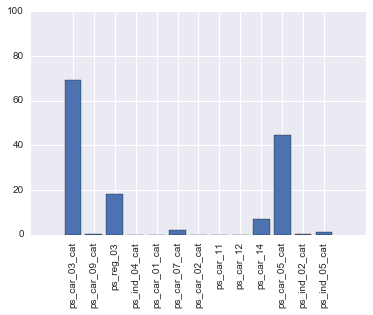

{'ps_car_01_cat': 0.01797678810239041,
 'ps_car_02_cat': 0.0008400368272145051,
 'ps_car_03_cat': 69.08983689844963,
 'ps_car_05_cat': 44.78253126617071,
 'ps_car_07_cat': 1.9302366215734896,
 'ps_car_09_cat': 0.09559619093701067,
 'ps_car_11': 0.0008400368272145051,
 'ps_car_12': 0.000168007365442901,
 'ps_car_14': 7.160473915176441,
 'ps_ind_02_cat': 0.036289590935666624,
 'ps_ind_04_cat': 0.013944611331760785,
 'ps_ind_05_cat': 0.975954785857812,
 'ps_reg_03': 18.106489788512327}

In [7]:
missing_percentages(data)

# Above, we can see there are 13 variables with different percentages of missing values. 

In [8]:
#Examine categorical variables and their relationship to the target variable.  These would be variables ending with 
# 'cat' or 'bin'.

from scipy.stats import chi2_contingency
data=data.replace(-1, np.nan)

for i in data.columns:
    if 'cat' in i or 'bin' in i:
        table=pd.crosstab(data[i], data['target'])
        table=np.array(table)
        result=chi2_contingency(table, correction=True)
        test_stat=result[0]
        p_val=result[1]
        print i, test_stat, p_val
        
        
        

ps_ind_02_cat 23.0395228115 3.96242019874e-05
ps_ind_04_cat 61.1490890168 5.2912246979e-15
ps_ind_05_cat 771.160950385 2.61806265455e-163
ps_ind_06_bin 688.376557889 1.00769272259e-151
ps_ind_07_bin 696.502044429 1.7232976058e-153
ps_ind_08_bin 102.688838423 3.9214763966e-24
ps_ind_09_bin 40.2691970732 2.2127034438e-10
ps_ind_10_bin 1.49083915207 0.222086306306
ps_ind_11_bin 2.19212980726 0.138717387178
ps_ind_12_bin 35.8787342243 2.09988184204e-09
ps_ind_13_bin 3.18877595278 0.0741455110366
ps_ind_16_bin 458.965332287 8.07334244931e-102
ps_ind_17_bin 816.557983753 1.35551103174e-179
ps_ind_18_bin 12.2845909197 0.000456713497746
ps_car_01_cat 770.783978929 3.54142753331e-158
ps_car_02_cat 591.823589903 1.00520235661e-130
ps_car_03_cat 78.8484803814 6.70610065189e-19
ps_car_04_cat 866.457339876 1.04126152456e-180
ps_car_05_cat 0.2406639612 0.623726977799
ps_car_06_cat 831.485524094 8.85299991642e-166
ps_car_07_cat 226.866524074 2.87555328262e-51
ps_car_08_cat 246.005000014 1.92936005629

# Above, we see several categorical variables that appear to have no real relationship with our target variable.  We will remove these variables from our final data set.

In [9]:
#Above, we can see that only a select few of these 'bin' variables have a significant relationship with our target variable.
# Let's drop the variables which do not have a significant relationship.  Also drop ps_car_05_cat and ps_car_10_cat
data=data.drop(['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
                'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_car_05_cat', 'ps_car_10_cat'], axis=1)

data.shape

(595212, 48)

In [10]:
#We must define what the continuous features are.  They are any column whose dtype is float.
continuous_vars=[]

for i in data.columns:
    if data[i].dtype==float:
        if 'cat' not in i:
            print i
            continuous_vars.append(i)
        
df_continuous=data[continuous_vars]

df_continuous.head()

ps_reg_01
ps_reg_02
ps_reg_03
ps_car_11
ps_car_12
ps_car_13
ps_car_14
ps_car_15
ps_calc_01
ps_calc_02
ps_calc_03


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2
1,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3
2,0.0,0.0,NaN,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1
3,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1
4,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0


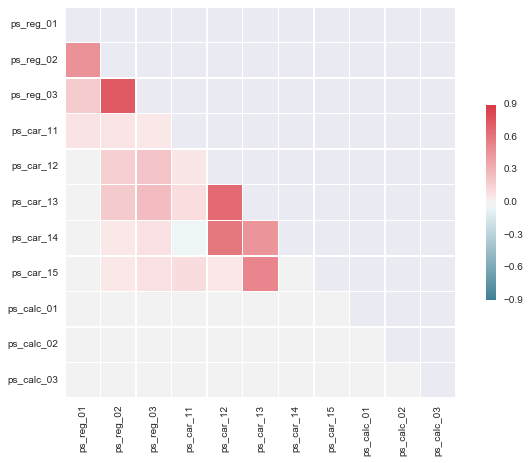

In [11]:
correlations=df_continuous.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 7))
#print f, ax


cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
#Above, we can see ps_reg_02 and ps_reg_03 appear to have a pretty strong positive relationship.  Let's drop one of 
# the two.
data=data.drop(['ps_reg_02'], axis=1)
data.shape

(595212, 47)

/Users/jon/python/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


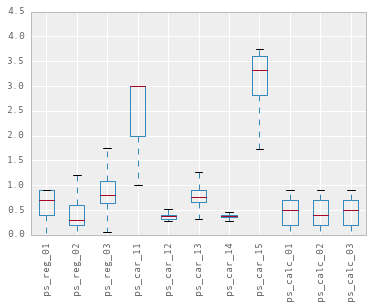

In [13]:
#Examine a boxplot of continuous features
pd.options.display.mpl_style = 'default'
df_continuous.boxplot(rot=90)

# Here, we will now create dummies for all categorical variables.  Keeping in mind, while there are ordinal variables in this data, those will be treated as continuous variables and thus, not dummy coded.  Let's first examine a correlation plot of those ordinal variables and our target to see which are important to keep in our data.  Since we are examining ordinal variables against our target variable, which is binary, I will use a point-biserial correlation method.

In [14]:
#Define all variables which we want to treat as continuous and examine relationship to the target variable. 
vars_1=[]

for i in data.columns:
    if data[i].dtype==int or data[i].dtype==float:
        if 'cat' not in i and 'bin' not in i and 'id' not in i:
            vars_1.append(i)


In [15]:
vars_1

['target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [16]:
#Run a point-biserial correlation for each one of these variables to see which are important.
from scipy import stats

a=data['target']
a=np.array(a)

for i in vars_1:
    print i, stats.pointbiserialr(a, data[i])

target PointbiserialrResult(correlation=1.0, pvalue=0.0)
ps_ind_01 PointbiserialrResult(correlation=0.01857025865750667, pvalue=1.4594266788379915e-46)
ps_ind_03 PointbiserialrResult(correlation=0.008359590302657649, pvalue=1.1220369494763593e-10)
ps_ind_14 PointbiserialrResult(correlation=0.0074428309647426808, pvalue=9.3448636827994937e-09)
ps_ind_15 PointbiserialrResult(correlation=-0.021506221687934729, pvalue=7.7104765648595867e-62)
ps_reg_01 PointbiserialrResult(correlation=0.022888044440398703, pvalue=8.4639618322116792e-70)
ps_reg_03 PointbiserialrResult(correlation=nan, pvalue=1.0)
ps_car_11 PointbiserialrResult(correlation=nan, pvalue=1.0)
ps_car_12 PointbiserialrResult(correlation=nan, pvalue=1.0)
ps_car_13 PointbiserialrResult(correlation=0.053898779484773868, pvalue=0.0)
ps_car_14 PointbiserialrResult(correlation=nan, pvalue=1.0)
ps_car_15 PointbiserialrResult(correlation=0.027667281027275076, pvalue=3.9544596704611188e-101)
ps_calc_01 PointbiserialrResult(correlation=0.00

# Above, we see some interesting results.  None of the variables have very strong correlations with the target variable.  No correlation is stronger than .027. But we do see more features we can remove which is good considering we already have a good number and we haven't even added our dummy variables yet.

In [17]:
data=data.drop(['ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_14', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
               'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 
               'ps_calc_12', 'ps_calc_13', 'ps_calc_14'], axis=1)
data.shape

(595212, 29)

In [18]:
#Now we are down to 29 columns before adding in our dummy coded variables.

In [18]:
cat_vars=[]

for i in data.columns:
    if 'cat' in i:
        cat_vars.append(i)
        
data=data.replace(np.nan, -1)
dfs = [pd.get_dummies(data[f], prefix=f) for f in cat_vars]
dummies=reduce(lambda df1, df2: df1.join(df2), dfs)
dummies.shape

(595212, 178)

In [19]:
X_data=data.copy()

for i in X_data.columns:
    if 'cat' in i:
        X_data=X_data.drop(i, axis=1)

In [20]:
#Insert the dummies for the dropped variables
X_data=X_data.join(dummies, rsuffix='d')

In [21]:
X_data.shape

(595212, 195)

In [22]:
X_data=shuffle(X_data)
n = len(X_data)/2
y=X_data['target']
X_train, X_test, y_train, y_test = X_data[:n], X_data[n:], y[:n], y[n:]
X_train=X_train.drop(['id', 'target'], axis=1)
X_test=X_test.drop(['id', 'target'], axis=1)

#Handle missing values by imputing based on variable type
#For continuous, impute using the mean and all others can used the mode.

In [24]:
from sklearn import feature_selection
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score
d={}
results = []
for i in range(1, 100, 10):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    pipe = make_pipeline_imb(RandomUnderSampler(random_state=42),
                         StandardScaler(),
                         SVC(kernel='linear', C=.01))
    
    pipe.fit(X_train_fs, y_train)
    X_test_fs = fs.transform(X_test)
    y_pred = pipe.predict(X_test_fs)
    n_features=X_train_fs.shape[1]
    print (i, "F1 score = %s" %f1_score(y_test, y_pred), "Recall score is %s" %recall_score(y_test,y_pred), 
           "Number of features=%s" %n_features)
    columns = np.asarray(X_train.columns.values)
    support = np.asarray(fs.get_support())
    feature_names = columns[support]
    d[n_features]=feature_names

(1, 'F1 score = 0.0966972246641', 'Recall score is 0.318855249839', 'Number of features=2')
(11, 'F1 score = 0.100322754169', 'Recall score is 0.480537406828', 'Number of features=22')
(21, 'F1 score = 0.10044519399', 'Recall score is 0.509708291157', 'Number of features=41')
(31, 'F1 score = 0.100565547187', 'Recall score is 0.517898223981', 'Number of features=60')
(41, 'F1 score = 0.101009914347', 'Recall score is 0.502990705807', 'Number of features=79')
(51, 'F1 score = 0.101357918414', 'Recall score is 0.503818901261', 'Number of features=98')
(61, 'F1 score = 0.100859504735', 'Recall score is 0.508604030551', 'Number of features=118')
(71, 'F1 score = 0.10033952178', 'Recall score is 0.511272660348', 'Number of features=137')
(81, 'F1 score = 0.0994803524566', 'Recall score is 0.526732308825', 'Number of features=156')
(91, 'F1 score = 0.0995569500233', 'Recall score is 0.531425416398', 'Number of features=175')


In [23]:
from sklearn import feature_selection
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score
d={}
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_classif, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    pipe = make_pipeline_imb(RandomUnderSampler(random_state=42),
                         StandardScaler(),
                         SVC(kernel='linear', C=.01))
    
    pipe.fit(X_train_fs, y_train)
    X_test_fs = fs.transform(X_test)
    y_pred = pipe.predict(X_test_fs)
    n_features=X_train_fs.shape[1]
    print (i, "F1 score = %s" %f1_score(y_test, y_pred), "Recall score is %s" %recall_score(y_test,y_pred), 
           "Number of features=%s" %n_features)
    columns = np.asarray(X_train.columns.values)
    support = np.asarray(fs.get_support())
    feature_names = columns[support]
    d[n_features]=feature_names

(1, 'F1 score = 0.0828096240901', 'Recall score is 0.230456852792', 'Number of features=2')
(6, 'F1 score = 0.0951416363349', 'Recall score is 0.416151361329', 'Number of features=12')
(11, 'F1 score = 0.0996505081229', 'Recall score is 0.456575911398', 'Number of features=22')
(16, 'F1 score = 0.0997203741201', 'Recall score is 0.477249653899', 'Number of features=31')
(21, 'F1 score = 0.100028699895', 'Recall score is 0.482510383018', 'Number of features=41')
(26, 'F1 score = 0.0989340220709', 'Recall score is 0.486109829257', 'Number of features=50')
(31, 'F1 score = 0.0988084206191', 'Recall score is 0.487125057683', 'Number of features=60')
(36, 'F1 score = 0.0998967233124', 'Recall score is 0.491001384402', 'Number of features=70')
(41, 'F1 score = 0.0998130841121', 'Recall score is 0.492847254269', 'Number of features=79')
(46, 'F1 score = 0.0994265265862', 'Recall score is 0.500046146747', 'Number of features=89')
(51, 'F1 score = 0.0994365991073', 'Recall score is 0.5017074296

In [28]:
from sklearn import feature_selection
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score
d_chi={}
results = []
for i in range(1, 100, 10):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    pipe = make_pipeline_imb(RandomUnderSampler(random_state=42),
                         StandardScaler(),
                         SVC(kernel='linear', C=.01))
    
    pipe.fit(X_train_fs, y_train)
    X_test_fs = fs.transform(X_test)
    y_pred = pipe.predict(X_test_fs)
    n_features=X_train_fs.shape[1]
    print (i, "F1 score = %s" %f1_score(y_test, y_pred), "Recall score is %s" %recall_score(y_test,y_pred), 
           "Number of features=%s" %n_features)
    columns = np.asarray(X_train.columns.values)
    support = np.asarray(fs.get_support())
    feature_names = columns[support]
    d_chi[n_features]=feature_names

(1, 'F1 score = 0.0812116344444', 'Recall score is 0.32662667282', 'Number of features=2')
(11, 'F1 score = 0.0954373174823', 'Recall score is 0.425288417167', 'Number of features=22')
(21, 'F1 score = 0.0989663856558', 'Recall score is 0.469681587448', 'Number of features=41')
(31, 'F1 score = 0.0996004088839', 'Recall score is 0.494600830641', 'Number of features=60')
(41, 'F1 score = 0.0998130841121', 'Recall score is 0.492847254269', 'Number of features=79')
(51, 'F1 score = 0.0998266769923', 'Recall score is 0.499676972773', 'Number of features=98')
(61, 'F1 score = 0.099301352395', 'Recall score is 0.510290724504', 'Number of features=118')
(71, 'F1 score = 0.0988875589664', 'Recall score is 0.518504845408', 'Number of features=137')
(81, 'F1 score = 0.0987569365411', 'Recall score is 0.516566682049', 'Number of features=156')
(91, 'F1 score = 0.097993214781', 'Recall score is 0.518504845408', 'Number of features=175')


In [29]:
d_chi[2]

array(['ps_ind_07_bin', 'ps_ind_17_bin'], dtype=object)

In [32]:
d[2]

array(['ps_car_13', 'ps_car_04_cat_0'], dtype=object)

In [34]:
#Let's fit a model with the top two variables from these different variable selection techniques and see how the  model
# performs. Keeping in mind that the orifinal data (X_data) has already been shuffled.

new_data_X=X_data[['ps_ind_07_bin', 'ps_ind_17_bin', 'ps_car_13', 'ps_car_04_cat_0']]
new_data_Y=X_data['target']
X_train, X_test, y_train, y_test=new_data_X[:n], new_data_X[n:], new_data_Y[:n], new_data_Y[n:]
pipe = make_pipeline_imb(RandomUnderSampler(random_state=42),
                         StandardScaler(),
                         SVC(kernel='linear', C=.01))

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.66      0.44      0.79      0.21      0.05    286771
          1       0.05      0.44      0.66      0.09      0.21      0.04     10835

avg / total       0.94      0.65      0.45      0.76      0.21      0.05    297606



In [35]:
print recall_score(y_test,y_pred)

0.444670050761


In [36]:
print f1_score(y_test,y_pred)

0.0851974324061
